In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [13]:
workingdirect='C:\wanglf2016\kaggle\Liberty_Mutual_fireloss_prediction\data'
read_all=1
if read_all==1:
    train_data=pd.read_csv('../data/train.csv',sep=',',header=0)    
else:
    train_data=pd.read_csv('../data/train.csv',sep=',',header=0,\
                           skiprows=range(1,10), nrows=30000)
test_data=pd.read_csv('../data/test.csv',sep=',',header=0,\
                      skiprows=range(1,10), nrows=100)
num_train=len(train_data)
num_test=len(test_data)
features_name=train_data.columns
print('total train data={}'.format(len(train_data)))
print('total test data={}'.format(len(test_data)))

total train data=452061
total test data=100


C:\Users\wanglf\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_data.head(10)

,id,target,var1,var2,var3,var4,var5,var6,var7,var8,...,weatherVar227,weatherVar228,weatherVar229,weatherVar230,weatherVar231,weatherVar232,weatherVar233,weatherVar234,weatherVar235,weatherVar236
0,12,0,Z,Z,Z,R3,Z,Z,3,1,...,0.287467,0,0.000000,1.557583,0.000000,1.228087,0.037004,2.195119,0.635887,0.000000
1,13,0,Z,Z,Z,I1,Z,Z,3,2,...,2.683024,0,0.687706,2.085186,20.539886,1.201075,0.152336,2.998211,8.093103,40.131033
2,15,0,Z,Z,Z,H1,Z,Z,3,3,...,1.075339,0,1.702072,1.664786,0.032362,1.129320,0.615880,1.445566,1.560813,0.025779
3,17,0,3,Z,3,J4,B,Z,2,4,...,1.639626,0,1.117522,1.774090,0.333843,1.094061,0.770711,0.910171,1.503005,0.398833
4,18,0,Z,Z,Z,D3,Z,Z,2,6,...,0.702697,0,0.000000,0.636907,0.034066,1.064163,2.737218,0.588934,0.404655,0.017829
5,19,0,Z,Z,Z,A1,Z,Z,7,Z,...,0.681403,0,2.682052,0.327912,1.257023,1.153651,0.851220,1.766803,1.213965,0.623341
6,22,0,Z,Z,Z,R6,Z,Z,3,2,...,1.639626,0,0.000000,1.227569,0.243569,1.037976,1.165114,0.053539,0.115616,0.290606
7,23,0,Z,Z,Z,O2,Z,Z,4,1,...,0.053235,0,0.000000,0.000000,0.088571,1.084576,0.271584,0.000000,0.000000,0.003434
8,25,0,3,Z,Z,F1,Z,Z,3,2,...,0.425877,0,0.000000,0.000000,0.158405,0.986222,0.011091,1.070790,0.462463,0.049128
9,28,0,Z,Z,Z,M1,Z,Z,4,1,...,0.489758,0,0.000000,0.000000,0.783510,1.050760,0.872963,0.803092,0.404655,0.279157


In [14]:
num_fire=len([train_data.target>0])
print ('True signal percentage= {}'.format(num_fire/num_train))

True signal percentage= 2.2120908461468696e-06


In [15]:
num_miss_col=np.sum(train_data.isnull())
num_miss_row=np.sum(train_data.isnull().any(axis=1))
print ('number of missing col={}'.format(num_miss_col))
print ('number of missing row={}'.format(num_miss_row))

number of missing col=id                    0
target                0
var1                  0
var2                  0
var3                  0
var4                  0
var5                  0
var6                  0
var7                  0
var8                  0
var9                  0
var10                 0
var11                 0
var12            355042
var13                 0
var14            290466
var15             98856
var16            361693
var17                 0
dummy                 0
crimeVar1        109988
crimeVar2        114553
crimeVar3        109988
crimeVar4        112798
crimeVar5        110655
crimeVar6        109988
crimeVar7        117363
crimeVar8        109988
crimeVar9        109988
geodemVar1         1996
                  ...  
weatherVar207     19386
weatherVar208     19386
weatherVar209     32373
weatherVar210     32373
weatherVar211     32373
weatherVar212     32373
weatherVar213     32373
weatherVar214     32373
weatherVar215     32373
weatherVar216     

In [16]:
# fill NA with Mean
for x in features_name:
    if (train_data[x].dtype==float):
        train_data[x].fillna(train_data[x].mean(),inplace=True)
        #        print(x)

###### data split

In [17]:
weather_names=[]
weather_list=[]
geo_names=[]
geo_list=[]
crime_names=[]
crime_list=[]
for (i,x) in enumerate(features_name):
    if (re.search('^wea',x)!=None):
        weather_names.append(x)
        weather_list.append(i)
    if (re.search('^geo',x)!=None):
        geo_names.append(x)
        geo_list.append(i)
    if (re.search('^cri',x)!=None):
        crime_names.append(x)
        crime_list.append(i)
weather_data=train_data[weather_list]
crime_data=train_data[crime_list]
geo_data=train_data[geo_list]

In [18]:
crime_data.head(10)

,crimeVar1,crimeVar2,crimeVar3,crimeVar4,crimeVar5,crimeVar6,crimeVar7,crimeVar8,crimeVar9
0,0.868651,0.625186,0.685535,0.698889,1.322650,1.036953,0.739831,1.233004,0.985852
1,1.049803,0.668872,0.902722,0.658104,1.679865,0.505010,0.754489,0.887022,0.977406
2,1.887331,1.513871,1.274002,1.256733,1.046967,1.070620,1.302359,1.122016,1.572879
3,1.659096,1.341626,0.957322,1.328928,0.661204,1.232223,1.276299,0.904233,1.346898
4,0.894055,1.380088,1.133255,1.249629,1.258417,0.922484,1.285127,1.022282,0.954293
5,0.982370,0.838204,0.706161,1.277758,1.313698,1.050420,1.181866,1.478149,1.138425
6,1.030203,0.985531,0.986128,0.981546,1.047476,0.999939,0.988336,0.984406,1.011130
7,2.088035,1.527601,0.789881,1.213436,2.121151,1.515029,1.372655,1.705200,1.866123
8,0.744558,1.184914,1.044682,1.087479,0.752655,1.111021,1.083817,0.990287,0.853243
9,0.868651,0.625186,0.685535,0.698889,1.322650,1.036953,0.739831,1.233004,0.985852


In [25]:
weather_data.head(10)

,weatherVar1,weatherVar2,weatherVar3,weatherVar4,weatherVar5,weatherVar6,weatherVar7,weatherVar8,weatherVar9,weatherVar10,...,weatherVar227,weatherVar228,weatherVar229,weatherVar230,weatherVar231,weatherVar232,weatherVar233,weatherVar234,weatherVar235,weatherVar236
0,0.182784,0,1.126181,0.001438,0.291717,0.005983,1.103744,1.444520,0.000000,1.016891,...,0.170351,0,0.000000,0.000000,1.117353,1.215303,0.112556,2.355737,0.404655,0.138667
1,0.096741,0,1.103729,0.001916,0.284243,0.007736,1.112626,0.841267,0.000000,1.054624,...,0.266173,0,27.508230,0.000000,3.828979,1.036739,0.033052,0.856632,0.231232,0.742199
2,0.245670,0,1.291792,0.000000,1.373878,0.000000,1.394500,0.000000,0.731094,1.083278,...,0.979517,0,0.000000,0.456134,0.098790,1.076535,0.566352,0.696013,0.693695,0.070654
3,0.083387,0,1.302432,0.000000,1.307082,0.000000,1.427265,0.043718,15.233289,0.868432,...,0.308761,0,0.000000,4.349042,0.401975,0.340631,0.290147,0.000000,0.000000,0.090332
4,0.538739,0,1.178029,0.081550,0.964872,0.167968,1.177430,0.748524,0.000000,0.693000,...,2.171972,0,0.000000,0.514990,0.516095,1.016120,1.313732,1.338487,2.948202,0.816485
5,1.672039,0,0.862954,2.215162,0.890823,0.642357,0.886472,0.000000,0.000000,1.065965,...,1.235043,0,0.000000,0.000000,1.495482,1.010759,1.173893,1.070790,1.329581,1.344278
6,0.961720,0,1.164071,0.004185,1.418573,0.008105,1.237492,0.000000,8.493282,1.053294,...,0.713344,0,0.000000,0.000000,0.274229,1.135300,0.789888,0.963711,0.693695,0.142629
7,0.297298,0,1.064529,0.000000,0.422871,0.000000,1.048504,0.346228,1.685836,0.741166,...,0.010647,0,0.000000,0.000000,0.255492,0.886631,0.003998,0.000000,0.000000,0.001981
8,3.677850,0,1.033441,0.229109,1.340540,0.283406,1.042148,0.000000,13.293399,0.997872,...,1.618332,0,1.134714,0.138732,0.095384,1.129114,2.222157,1.659724,2.716970,0.113179
9,0.189393,0,1.129245,0.000000,0.310479,0.000000,1.104817,1.192119,0.000000,0.969317,...,0.287467,0,0.000000,1.557583,0.000000,1.228087,0.037004,2.195119,0.635887,0.000000


###### Weather features reduce PCA

In [20]:
from sklearn.decomposition import PCA
weather_data_scale=weather_data/np.std(weather_data,0)

In [ ]:
pca=PCA()
pca.set_params(n_components=10)
first = pca.fit(weather_data).components_[[0]]
second= pca.fit(weather_data).components_[[1]]
third = pca.fit(weather_data).components_[[2]]

PCA expalined=[ 0.21989125  0.19546478  0.07611382  0.07565445  0.0667778   0.0514113
  0.0384425   0.03770279  0.03092071  0.02954143]


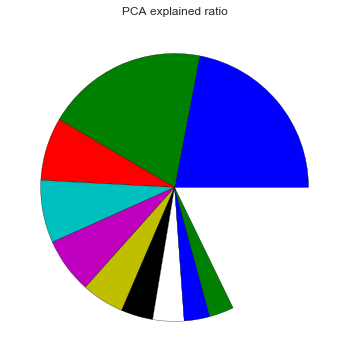

In [23]:
#print ('PCA components={}'.format(pca.components_))
print ('PCA expalined={}'.format(pca.explained_variance_ratio_))
#pca.mean_
plt.figure(figsize=(6,6))
plt.pie(x=pca.explained_variance_ratio_,radius=1)
plt.title('PCA explained ratio')

In [42]:
pca=PCA()
pca.set_params(n_components=3)
first = pca.fit(weather_data).components_[[0]]

In [43]:
pca.explained_variance_ratio_

array([ 0.21989125,  0.19546478,  0.07611382])

In [44]:
weather_pca=pca.transform(weather_data)

###### crime data : (452061, 9)

PCA expalined=[ 0.5459419   0.18181428  0.0939112 ]


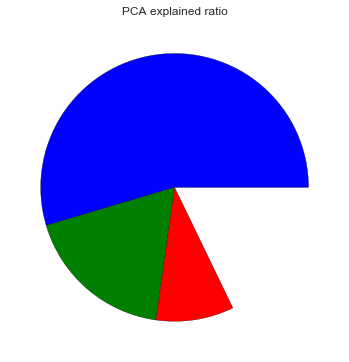

In [49]:
pca2=PCA()
pca2.set_params(n_components=3)
pca2.fit(crime_data)
print ('PCA expalined={}'.format(pca2.explained_variance_ratio_))
#pca.mean_
plt.figure(figsize=(6,6))
plt.pie(x=pca2.explained_variance_ratio_,radius=1)
plt.title('PCA explained ratio')

###### geo data

PCA expalined=[ 0.62751755  0.17097318  0.06061467]


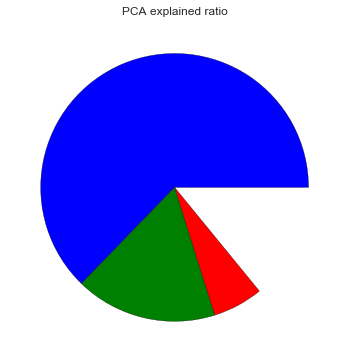

In [51]:
pca3=PCA()
pca3.set_params(n_components=3)
pca3.fit(geo_data)
print ('PCA expalined={}'.format(pca3.explained_variance_ratio_))
#pca.mean_
plt.figure(figsize=(6,6))
plt.pie(x=pca3.explained_variance_ratio_,radius=1)
plt.title('PCA explained ratio')

###### collreation study